<a href="https://colab.research.google.com/github/shivanshudwivedi/Deep-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading images to Colab
from io import BytesIO
import requests
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image, ImageFile

%matplotlib inline


url = 'https://science4fun.info/wp-content/uploads/2017/05/tree.jpg'

response = requests.get(url, headers = {'User-Agent' : 'Chrome'})
img = Image.open(BytesIO(response.content))
img.load()

print(np.asarray(img))

#Another way of importing images directly

#Load the image
image = Image.open('/content/im.png')

#Print Image
print(image.format)
print(image.mode)
print(image.size)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
PNG
RGBA
(1024, 1024)


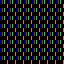

In [ ]:
#From pixels create images

import numpy as np
from PIL import Image

w, h = 64, 64
data = np.zeros((h, w, 3))

#Yellow
for row in range(32):
  for col in range(32):
    data[row, col] = [255, 255, 0]

#Red
for row in range(32):
  for col in range(32):
    data[row + 32, col] = [255, 0, 0]

#Green
for row in range(32):
  for col in range(32):
    data[row + 32, col + 32] = [0, 255, 0]

#Blue
for row in range(32):
  for col in range(32):
    data[row, col + 32] = [0, 0, 255]

img = Image.fromarray(data, 'RGB')
img


Rows and Columns:  567 640


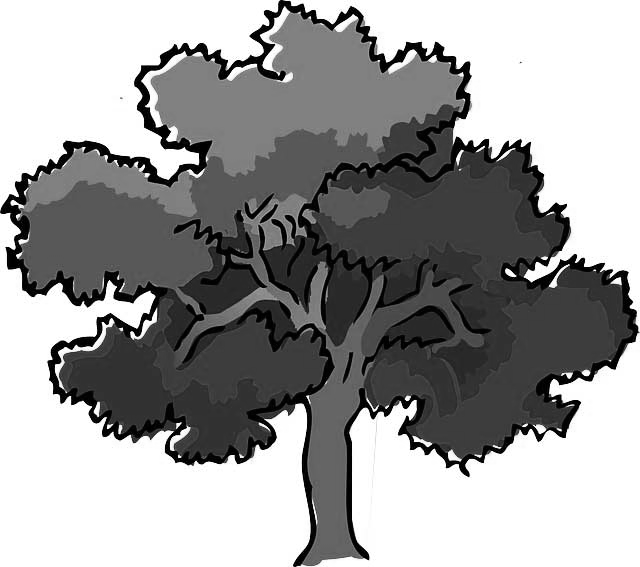

In [ ]:
#Transform Image at Pixel Level
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO

%matplotlib inline
url = 'https://science4fun.info/wp-content/uploads/2017/05/tree.jpg'
response = requests.get(url, headers = {'User-Agent' : 'Chrome'})

img = Image.open(BytesIO(response.content))
img.load()

img_array = np.asarray(img)
rows = img_array.shape[0]
cols = img_array.shape[1]

print('Rows and Columns: ', rows, cols)

#Create a new image
img2_array = np.zeros((rows, cols, 3), dtype = np.uint8)
for row in range(rows):
  for col in range(cols):
    t = np.mean(img_array[row, col])
    img2_array[row,col] = [t, t, t]

img2 = Image.fromarray(img2_array, 'RGB')
img2


/content/Photo.jpg


<ipython-input-20-019feb15a1f8>:33: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((128, 128), Image.ANTIALIAS)


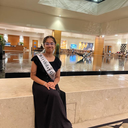

/content/O2.jpg


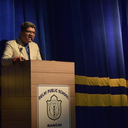

/content/im.png


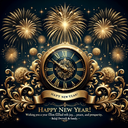

(3,)


<ipython-input-20-019feb15a1f8>:42: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.array(x)


In [ ]:
#Standardize Image
#It makes all images of same size and square

%matplotlib inline
from PIL import Image, ImageFile
import requests
from matplotlib.pyplot import imshow
import numpy as np
import io as BytesIO
from IPython.display import display, HTML

images = ['/content/Photo.jpg', '/content/O2.jpg', '/content/im.png']

def crop_square(image):
  width, height = image.size

  #Crop the image, centered
  new_width = min(width, height)
  new_height = new_width
  left = (width - new_width)/2
  top = (height - new_height)/2
  right = (width + new_width)/2
  bottom = (height + new_height)/2
  return image.crop((left, top, right, bottom))

x = []

for url in images:
  ImageFile.LOAD_TRUNCATED_IMAGES = False
  img = Image.open(url)
  img.load()
  img = crop_square(img)
  img = img.resize((128, 128), Image.ANTIALIAS)
  print(url)
  display(img)
  img_array = np.asarray(img)
  img_array = img_array.flatten()
  img_array = img_array.astype(np.float32)
  img_array = (img_array - 128)/128
  x.append(img_array)

x = np.array(x)
print(x.shape)


Rows & Columns:  640 960
(640, 960, 3)


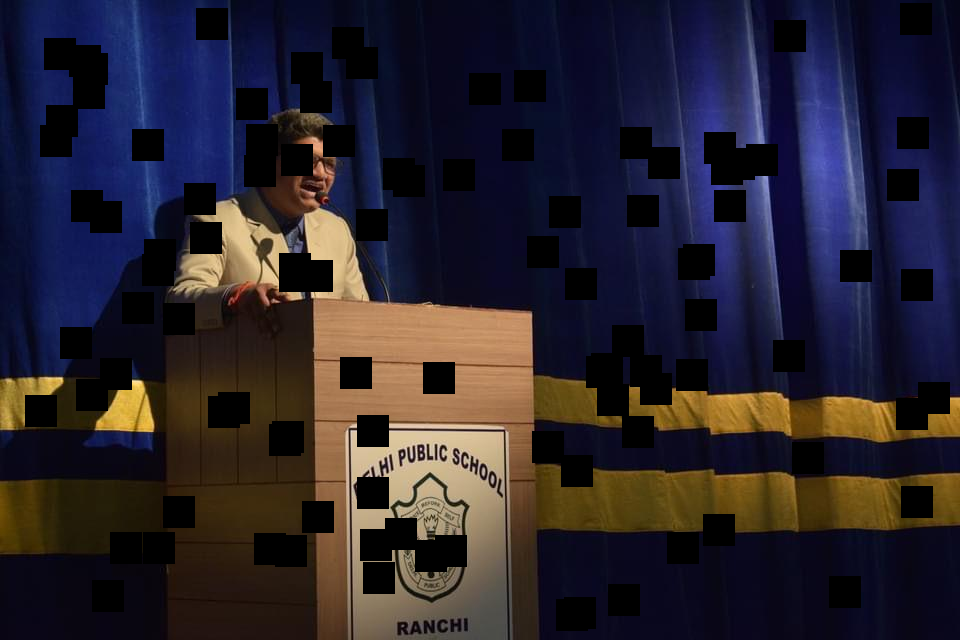

In [ ]:
#Adding noise to an image

from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
%matplotlib inline

def add_noise(a):
  a2 = a.copy()
  rows = a2.shape[0]
  cols = a2.shape[1]
  s = int(min(rows, cols)/20)

  for i in range(100):
    x = np.random.randint(cols-s)
    y = np.random.randint(rows-s)
    a2[y:(y+s), x:(x+s)] = 0

  return a2

img = Image.open('/content/O2.jpg')
img.load()

img_array = np.asarray(img)
rows = img_array.shape[0]
cols = img_array.shape[1]

print('Rows & Columns: ', rows, cols)

#Create new image
img2_array = img_array.astype(np.uint8)
print(img2_array.shape)
img2_array = add_noise(img2_array)
img2 = Image.fromarray(img2_array, 'RGB')
img2

In [ ]:
#Image Pre Processing
import imageio
import glob
from tqdm import tqdm
from PIL import Image
import os

def scale(img, scale_width, scale_height):
  img = img.resize((scale_width, scale_height, Image.ANTIALIAS))
  return img

def standardize(img):
  rgbimg = Image.new('RGB', image.size)
  rgbimg.paste(img)
  return rbgimg

def fail_below(img, check_width, check_height):
  width, height = img.size
  assert width == check_width
  assert height == check_height

def crop_square(image):
  width, height = image.size

  #Crop the image, centered
  new_width = min(width, height)
  new_height = new_width
  left = (width - new_width)/2
  top = (height - new_height)/2
  right = (width + new_width)/2
  bottom = (height + new_height)/2
  return image.crop((left, top, right, bottom))

files = glob.glob(os.path.join(SOURCE, '*.jpg'))

#for file in tqdm

for file in tqdm(files, desc = 'files'):
  try:
    target = ''
    name = os.path.basename(file)
    filename, _ = os.path.splitext(name)
    img = Image.open(file)
    img = standardize(img)
    img = crop_square(img)
    img = img.scale(img, 128, 128)

    target = os.path.join(TARGET, filename+'.jpg')
    img.save(target, quality = 25)
  except KeyboardInterrupt:
    print('Keyboard Interuppt')
    print()
  except AssertionError:
    print('Assertion')

  except:
    print('Unexpected Exception')



11490434/11490434 [==============================] - 0s 0us/step
Shape of x train:  [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
Shape of y train:  [5 0 4 ... 5 6 8]

Shape of x test:  [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]


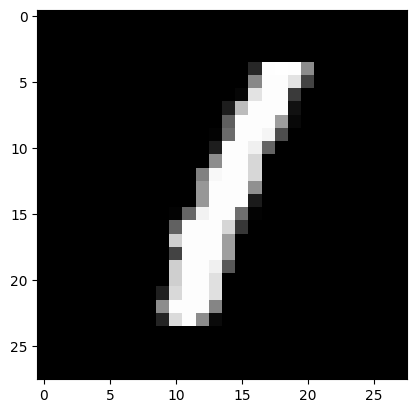

In [ ]:
#Using Tenserflow with CNNs
import tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist
from IPython.display import display
import pandas as pd
import random

#Creating Datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Shape of x train: ', x_train)
print('Shape of y train: ', y_train)
print()
print('Shape of x test: ', x_test)
print('Shape of y test: ', y_test)

#Display as text
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_columns', 5)

print('Shape: ', x_train.shape)
print('Labels: ', y_train)

#Single MNIST digits
single = x_train[0]
print('Shape for single: ', single.shape)

pd.DataFrame(single.reshape(28,28))

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

digit = 105
a = x_train[digit]
plt.imshow(a, cmap = 'gray', interpolation = 'nearest')
print()
print(digit)

<Figure size 640x480 with 0 Axes>

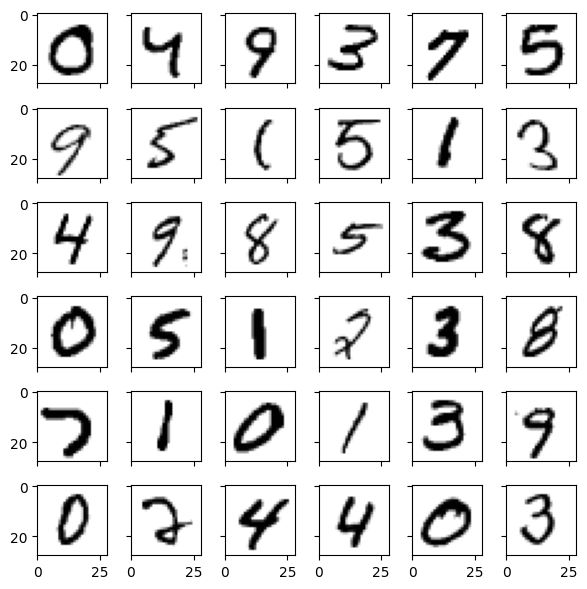

In [ ]:
#Manual CNN with Tensorflow
import random

ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)

sample_images = x_train[random_indices, :]
plt.clf()

fig, axes = plt.subplots(ROWS, ROWS, figsize = (ROWS, ROWS), sharex = True, sharey = True)

for i in range(ROWS*ROWS):
  subplot_row = i // ROWS
  subplot_col = i % ROWS
  ax = axes[subplot_row, subplot_col]

  plottable_image = np.reshape(sample_images[i, :], (28, 28))
  ax.imshow(plottable_image, cmap = 'gray_r')

  ax.set_xbound([0, 28])

plt.tight_layout()
plt.show()


In [ ]:
#CNN building with Tensorflow

import keras
import time
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.utils import to_categorical
import keras.utils
from keras import utils as np_utils
from tensorflow.keras import utils as np_utils
from tensorflow import keras
from sklearn import metrics

batch_size = 128
num_classes = 10
epochs = 12

#Input Image Dimensions
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape: ', x_train.shape)
print('Training Samples: ', x_train.shape[0])
print('Test Samples: ', x_test.shape[0])

#Convert class vectors to binary class metrics
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)


#Building Neural Network
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = input_shape))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#Training the model
start_time = time.time()

model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose = 2, validation_data = (x_test, y_test))
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test Loss: ', score[0])
print('Accuracy: ', score[1])
elapsed_time = time.time() - start_time
print('Elapsed Time: ', elapsed_time)


#Evaluating the accuracy
#To grab and test only the first 100 images
small_x = x_test[1: 100]
small_y = y_test[1: 100]
small_y2 = np.argmax(small_y, axis = 1)
pred = model.predict(small_x)
pred = np.argmax(pred, axis = 1)
score = metrics.accuracy_score(small_y2, pred)
print('Accuracy: ', score)

x_train shape:  (60000, 1, 28, 28, 1)
Training Samples:  60000
Test Samples:  10000


In [ ]:
#Using MNIST dataset fashion
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import fashion_mnist
import pandas as pd
from IPython.display import display

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('Shape of x train: ', x_train.shape)
print('Shape of y train: ', y_train.shape)
print('Shape of x test: ', x_test.shape)
print('Shape of y test: ', y_test.shape)

print('Shape of dataset: ', x_train.shape)
print('Labels: ', y_train)

#Single MNIST digit
single = x_train[0]
print('Shape of single: ', single.shape)

pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 5)
pd.DataFrame(single.reshape(28, 28))

In [ ]:
#To diplay images

import random
ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)

sample_image = x_train[random_indices, :]
plt.clf()

fig, axes = plt.subplots(ROWS, ROWS, figsize = (ROWS, ROWS), sharex = True, sharey = True)

for i in range(ROWS*ROWS):
  subplot_row = i//ROWS
  subplot_col = i%ROWS
  ax = axes[subplot_row, subplot_col]

  plottable_image = np.reshape(sample_images[i, :], (28, 28))
  ax.imshow(plottable_image, cmap = 'gray_r')
  ax.set_xbound([0, 28])

plt.tight_layout()
plt.show()

In [ ]:
#Training / Fitting of CNN

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

#Input Image Dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.snape[0], 1, img_rows, img_cols)


In [ ]:
#Using a Regressional Convulational Nerural Network

#Downloading the dataset
import os

DOWNLOAD_SOURCE = 'https://www.kaggle.com/code/kerneler/starter-count-the-paperclips-ec4d52e4-d/input'
DOWNLOAD_NAME = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1:]

COLAB = True

if COLAB:
  PATH = '/content/sample_data'

else:
  PATH = '/Users/shivanshu/Documents/'

EXTRACT_TARGET = os.path.join(PATH, 'clips')
SOURCE = os.path.join(EXTRACT_TARGET, 'paperclips')

#Importing Data as Pandas
import pandas as pd

df = pd.read_csv(os.path.join(SOURCE, 'train.csv'), na_values = ['NA', '?'])
df['filename']  = 'clips' - df['id'].astype(str) + 'jpg'
df.head()

#Splitting data to train and test datasets
TRAIN_PCT = 0.9
TRAIN_CUT = int(len(df) * TRAIN_PCT)

df_train = df[0 : TRAIN_CUT]
df_test = df[TRAIN_CUT: ]

print("Training Size : ", len(df_train))
print('Testing Size: ', len(df_test))

#Using Image Generator from Keras
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale = 1./255, horizonatal_flip = True, vertical_flip = 'True', fill_mode = 'nearest')
train_generator = training_datagen.flow_from_dataframe(dataframe = df_train, directory = SOURCE, x_col = 'filename', y_col = 'clip_count', target_size = (256, 256), batch_size = 32, class_mode = 'other')

validation_datagen = ImageDataGenerator(rescale = 1./255)

val_generator = validation_datagen.flow_from_dataframe(dataframe = df_test, directory = SOURCE, x_col = 'filename', y_col = 'clip_count', target_size = (256, 256), batch_size = 32, class_mode = 'other')

#Defining the model

from tensorflow.keras.callbacks import EarlyStopping
import time

model = tf.keras.models.Sequential([
    #Desired input shape is 150x150 with 3 as the color code for RGB
    #First Convolution
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    #Second Convolution
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    #512 hidden neurons
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')
])

#Defining training parameters
epoch_steps = 250
validation_steps = len(df_test)
model.compile(loss = 'mean_sqaurede_error', optimizer = 'adam')
monitor = EarlyStopping(monitor = 'val_loss', min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto', restore_best_weights = True)

start_time = time.time()
history = model.fit(train_generator, verbose = 1, validation_data = val_generator, callbacks = [monitor], epochs = 25)

elapsed_time = time.time() - start_time
print('Time Elapsed: ', elapsed_time)

#Evaluating Predictions
val_generator.reset()
pred = model.predict(val_generator, steps = len(df_test))

df_submit = pd.DataFrame({'id' : df['id'], 'clip_count' : pred.flatten()})
df_submit.to_csv(os.path.join(PATH, 'submit.csv'), index = False)


In [ ]:
#Classification with CNN
import os

DOWNLOAD_SOURCE = 'https://www.kaggle.com/code/kerneler/starter-count-the-paperclips-ec4d52e4-d/input'
DOWNLOAD_NAME = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1 : ]

COLAB = True

if COLAB:
  PATH = '/content/'
  EXTRACT_TARGET = os.path.join(PATH, 'iris')
  SOURCE = EXTRACT_TARGET

else:
  PATH = '/Users/shivanshu/Documents/'
  EXTRACT_TARGET = os.path.join(PATH, 'iris')
  SOURCE = EXTRACT_TARGET

#Defining the Image Generator
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    vertical_flip = True,
    width_shift_range = [-200, 200],
    rotation_range = 360,
    fill_mode = 'nearest'
)

train_generator = training_datagen.flow_from_directory(directory = SOURCE, target_size = (256, 256), class_mode = 'categorical', batch_size = 32, shuffle = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(directory = SOURCE, taregt_size = (256, 256), class_mode = 'categorical', batch_size = 32, shuffle = True)

#Training the Data
from tensorflow.keras.callbacks import EarlyStopping

class_count = len(train_generator.class_indices)

model = tf.keras.models.Sequential([
    #First Convolution
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (256, 256, 3))
    tf.keras.layers.MaxPooling2D(2,2),

    #Second Convolution
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),

    #Third Convolution
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.MaxPooling2D(2,2),

    #Fourth Convolution
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.MaxPooling2D(2,2),

    #Fifth Convoution
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #Flatten the results
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    #512 Neuron hidden layer
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(class_count, activation  'softmax')
])

model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')
model.fit(train_generator, epochs = 50, steps_per_epoch = 10, verbose = 1)

#Evaluating Predictions
from sklearn.metrics import accuracy_score
import numpy as np

validation_generator.reset()
pred = model.predict(validation_generator)

predict_classes = np.argmax(pred, axis = 1)
expected_classes = validation_generator.classes

correct = accuracy_score(expected_classes, predict_classes)
print('Accuracy: ', correct)

In [ ]:
#Using MobileNet for image classification

import pandas as pd
import numpy as np
import os
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Activation, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

model = MobileNet(weights = 'imagenet', include_top = True)
model.summary()

#Classifying images through MobileNet
%matplotlib inline
from PIL import Image, ImageFile
import matplotlib.pyplot as plt
import requests
import numpy as np
import os
from io import BytesIO
from IPython.display import display, HTML
from tensorflow.keras.applications.mobilenet import decode_predictions

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3

ROOT = '/content/IRIS.csv'

def make_sqaure(img):
  cols, rows = img.size

  if rows > cols:
    pad = (rows - cols)/2
    img = img.crop((pad, 0, cols, cols))

  else:
    pad = (cols - rows)/2
    img = img.crop((0, pad, rows, rows))

  return img

def classify_image(url):
  x = []
  ImageFile.LOAD_TRUNCATED_IMAGES = False
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  img.load()
  img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT), Image.ANTIALIAS)

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
  x = preprocess_input(x)
  pred = model.predict(x)

  display(img)
  print(np.argmax(pred, axis = 1))

  lst = decode_predictions(pred, top = 5)
  for itm in lst[0]:
    print(itm)
#Example of classify image
img_url = 'https://cdn.pixabay.com/photo/2017/01/31/22/47/tree-2027899_1280.png'
classify_image(img_url)

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [ ]:
#Customizing a Pre Trained Model by using ResNet NN
import os

DOWNLOAD_SOURCE = 'https://www.kaggle.com/code/kerneler/starter-count-the-paperclips-ec4d52e4-d/input'
DOWNLOAD_NAME = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1]

COLAB = True

if COLAB:
  PATH = '/content/'

else:
  PATH = '/Users/shivanshu/Documents/'

EXTRACT_TARGET = os.path.join(PATH, 'clips')
SOURCE = os.path.join(EXTRACT_TARGET, 'paperclips')

df_train = pd.read_csv(os.path.join(SOURCE, 'train.csv'))
df_train['filename'] = 'clips-' + df_train.id.astype(str) + '.jpg'

#Setting up training and validation data sets
TRAIN_PCT = 0.9
TRAIN_CUT = int(len(df_train)*TRAIN_PCT)

df_train_cut = df_train[0:TRAIN_CUT]
df_validate_cut = df_train[TRAIN_CUT:]

print('Training Size: ', len(df_train_cut))
print('Validation Size: ', len(df_validate_cut))

#Creating the Image Generator
import tensorflow as tf
import keras_preprocessing
from keras_proprocessing import image
from keras_preprocessing.image import ImageDataGenerator

WIDTH = 256
HEIGHT = 256

training_datagen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True, vertical_flip = True, fill_mode = 'nearest')

#Decreasing the size of training set
train_generator = training_datagen.flow_from_dataframe(
    dataframe = df_train_cut,
    directory = SOURCE,
    x_col = 'filename',
    y_col = 'clip_count',
    target_size = (HEIGHT, WIDTH),
    batch_size = 32,
    class_mode = 'raw'
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

#Increasing the size of validation set
val_generator = validation_datagen.flow_from_dataframe(
    dataframe = df_validate_cut,
    directory = SOURCE,
    x_col = 'filename',
    y_col = 'clip_count',
    target_size = (HEIGHT, WIDTH),
    batch_size = 32,
    class_mode = 'raw'
)

#Using ResNet now
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input

input_tensor = Input(shape = (HEIGHT, WIDTH,3))

base_model = ResNet50(include_top = False, weights = None, input_tensor = input_tensor, input_shape = None)

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation = 'relu')(x)
x = Dense(1024, activation = 'relu')(x)
model = Model(inputs = base_model.input, outputs = Dense(1)(x))

#Training the ResNet model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import RootMeanSquaredError

#Calculate valid dataset size
STEP_SIZE_VALID = val_generator.n//val_generator.batch_size

model.compile(loss = 'mean_sqaured_error', optimizer = 'adam', metrics = [RootMeanSquaredError(name = 'rmse')])
monitor = EarlyStopping(mointor = 'val_loss',  min_delta = 1e-3, patience = 5, verbose = 1, mode = 'auto', restore_best_weights = True)
history = model.fit(train_generator, epochs = 100, steps_per_epoch = 250, validation_data = val_generator, callbacks = [monitor], verbose = 1, validation_steps = STEP_SIZE_VALID)


In [ ]:
#Image Augmentation

import urllib.request
import shutil
from IPython.display import Image

URL = 'https://cdn.pixabay.com/photo/2017/01/31/22/47/tree-2027899_1280.png'
LOCAL_IMG_FILE = '/content/'

with urllib.request.urlopen(URL) as response, open(LOCAL_IMG_FILE, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

Image(filename = LOCAL_IMG_FILE)

#Image Augmentation using Image Data Generator
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

def visualize_generator(img_file, gen):
  #Load the requested image
  img = load_img(img_file)
  data = img_to_array(img)
  samples = expand_dims(data, 0)

  #Generate Augmentations from augmentor
  it = gen.flow(samples, batch_size = 1)
  images = []
  for i in range(4):
    batch = it.next()
    image = batch[0].astype('uint8')
    images.append(image)

  images = np.array(images)

  #Create a grid of 4 images from generator
  index, height, width, chanels = images.shape
  nrows = index//2

  grid = (images.reshape(nrows, 2, height, width, chanels).swapaxes(1,2).reshape(height*nrows, width*2, 3))

  fig = plt.figure(figsize = (15., 15.))
  plt.axis('off')
  plt.imshow(grid)

#Augmenting image using developed function
visualize_generator(LOCAL_IMG_FILE, ImageDataGenerator(horizontal_flip = True, vertical_flip = True))
visualize_generator(LOCAL_IMG_FILE, ImageDataGenerator(width_shift_range = [-200, 200], fill_mode = 'nearest'))
visualize_generator(LOCAL_IMG_FILE, ImageDataGenerator(brightness_range = [0, 1]))

In [ ]:
#Using YOLO to classify multiple objects in an image

#Loading an image
import urllib.request
import shutil
from IPython.display import Image
!mkdir /content/

URL = 'https://cdn.pixabay.com/photo/2017/01/31/22/47/tree-2027899_1280.png'
LOCAL_IMG_FILE = '/content/img.png'

with urllib.request.urlopen(URL) as response, open(LOCAL_IMG_FILE, 'wb') as out_file:
  shutil.copyfileobj(response, out_file)

Image(filename = LOCAL_IMG_FILE)

#Installing YOLO5
from PIL import Image
import requests
from io import BytesIO
import torchvision.transforms.functional as TF

response = requests.get(url, headers = {'User-Agent' : 'Chrome'})
img = Image.open(BytesIO(response.content))

!pip install yolov5
!git clone https://github.com/ultrlytics/yolov5
%cd /content/yolov5
%pip install -qr requirements.txt

from yolov5 import utils
display = utils.notebook_init()

#Import YOLO
import argparse
import os
import sys
from pathlib import Path
import cv2
import torch
import torch.backends.cudnn as cudnn
from models.common import DetectMultiBackend
from utils.datasets import IMG_FORMATS, VID_FORMATS, LoadImages, LoadStreams
from utils.general import (LOGGER, check_file, check_img_size, check_imshow, check_requirements, colorstr, increment_path, non_max_suppression, print_args, scale_coords, strip_optimizer, xyxy2xywh)
from utils.plots import Annotator, colors, save_one_box
from utils.torch_utils import select_device, time_sync

device = select_device('')
weights = '/content/yolov5/yolov5s.pt'
imgsz = [image.height, image.width]
original_size = imgsz
model = DetectMultiBackend(weights, device = device, dnn = False)
stride, names, pt, jit, onnx, engine = model.stride, model.names, model.pt, model.jit, model.onnx, model.engine
imgsz = check_img_size(imgsz, s = stride)
print('Original size: ', original_size)
print('Input Size: ', imgsz)

#Importing and Loading Image
import numpy as np
source = '/content/'
half = False
conf_thres = 0.25
iou_thres = 0.45
classes = None
agnostic_nms = None
max_det = 1000

model.warmup(imgsz = (1, 3, *imgsz), half = half)
dt, seen = [0.0, 0.0, 0.0], 0

img2 = img.resize([imgsz[1],imgsz[0]], Image.ANTIALIAS)
img_raw = torch.from_numpy(np.asarray(img2)).to(device)
img_raw = img_raw.half() if half else img_raw.float()
img_raw /= 255
img_raw = img_raw.unsqueeze_(0)
img_raw = img_raw.permute(0, 3, 1, 2)
print(img_raw.shape)

#Predicting using YOLO
pred = model.predict(img_raw, augment = False, visualize = False)
pred = non_max_suppression(pred, conf_thres, iou_thres, classes, agnostic_nms, max_det = max_det)

results = []
for i, det in enumerate(pred):
  gn = torch.tensor(img_raw.shape)[[1, 0, 1, 0]]

  if len(det):
    det[:, :4] = scale_coords(original_size, det[:, :4], imgsz).round()

    for *xyxy, conf, cls in reversed(det):
      xywh = (xyxy2xywh(torch.sensor(xyxy).view(1,4))/ gn).view(-1).tolist()

      results.append([names[int(cls)], float(conf), [*xyxy]])

for itm in results:
  print(itm)

#Results
from PIL import Image, ImageDraw

img3 = img.copy()
draw = ImageDraw.Draw(img3)

for itm in results:
  b = itm[2]
  print(b)
  draw.rectangle(b)

img3


"\n#Loading an image\nimport urllib.request\nimport shutil\nfrom IPython.display import Image\n!mkdir /content/\n\nURL = 'https://cdn.pixabay.com/photo/2017/01/31/22/47/tree-2027899_1280.png'\nLOCAL_IMG_FILE = '/content/img.png'\n\nwith urllib.request.urlopen(URL) as response, open(LOCAL_IMG_FILE, 'wb') as out_file:\n  shutil.copyfileobj(response, out_file)\n\nImage(filename = LOCAL_IMG_FILE)\n\n#Installing YOLO5\nfrom PIL import Image\nimport requests\nfrom io import BytesIO\nimport torchvision.transforms.functional as TF\n\nresponse = requests.get(url, headers = {'User-Agent' : 'Chrome'})\nimg = Image.open(BytesIO(response.content))\n\n!pip install yolov5\n!git clone https://github.com/ultrlytics/yolov5\n%cd /content/yolov5\n%pip install -qr requirements.txt\n\nfrom yolov5 import utils \ndisplay = utils.notebook_init()\n\n#Import YOLO\nimport argparse\nimport os\nimport sys\nfrom pathlib import Path\nimport cv2\nimport torch\nimport torch.backends.cudnn as cudnn\nfrom models.common i